# NLP
## 1 -  What Tokenizer do?
## 2 - A simple example

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# Just a simple test
sentences = [
  "I like eggs and ham.",
  "I love chocolate and bunnies.",
  "I hate onions."
]


# 1 - Use Tokenizer

In [30]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE, oov_token='Unknown')
tokenizer.fit_on_texts(sentences)
sequence = tokenizer.texts_to_sequences(sentences)

In [37]:
tokenizer.texts_to_sequences(["i like apple"])

[[2, 4, 12]]

### How to get the word to index mapping?
show the indexes


In [36]:
tokenizer.word_index

{'Unknown': 1,
 'i': 2,
 'and': 3,
 'like': 4,
 'eggs': 5,
 'ham': 6,
 'love': 7,
 'chocolate': 8,
 'bunnies': 9,
 'hate': 10,
 'onions': 11,
 'apple': 12}

### Apply padding
apply padding with default settings

In [38]:
data = pad_sequences(sequence)
print(data)
print(data.shape)

[[ 2  4  5  3  6]
 [ 2  7  8  3  9]
 [ 0  0  2 10 11]]
(3, 5)


### customize padding
change padding mode to post

check the effect of changing maxlen


In [44]:

MAX_SEQUENCE_LENGTH = 5
data = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH, padding="pre", truncating="post")
print(data)

[[ 2  4  5  3  6]
 [ 2  7  8  3  9]
 [ 0  0  2 10 11]]


# 2 - Simple Example

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

## 2.1 Read data
read with pandas using correct encoding

In [46]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## 2.2 Preprocessing
- drop unnecessary columns
- create binary labels
- split up the data

In [49]:

df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

df.columns = ['labels','data']

df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

df_train,df_test,Ytrain,Ytest = train_test_split(df['data'], Y, test_size=0.33)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## 2.3 Using Tokenizer 

In [52]:
MAX_VOCAB_SIZE=20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

33.0
189


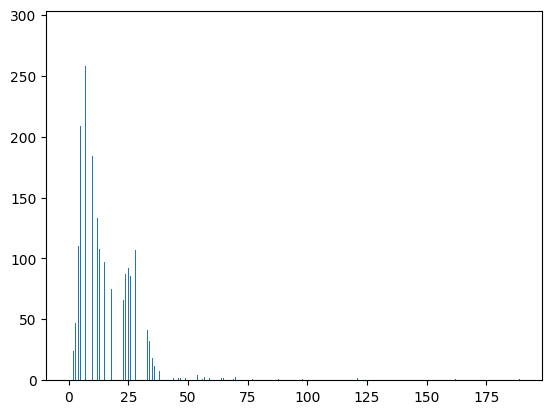

In [66]:
len_all_seq = [len(seq) for seq in sequences_train]
a = plt.hist(len_all_seq,1000)
print(np.quantile(len_all_seq, 0.95))
print(max(len_all_seq))

### 2.3.1 get word -> integer mapping

In [67]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7216 unique tokens.


In [68]:
word2idx

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'it': 13,
 'your': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'now': 21,
 'are': 22,
 'not': 23,
 'so': 24,
 'but': 25,
 'do': 26,
 "i'm": 27,
 'can': 28,
 'if': 29,
 'or': 30,
 'at': 31,
 'be': 32,
 'will': 33,
 'ur': 34,
 'get': 35,
 'with': 36,
 'no': 37,
 'just': 38,
 'we': 39,
 'this': 40,
 'gt': 41,
 'when': 42,
 'up': 43,
 'lt': 44,
 '4': 45,
 'from': 46,
 'ok': 47,
 'know': 48,
 'what': 49,
 'out': 50,
 'how': 51,
 'go': 52,
 'free': 53,
 'come': 54,
 'good': 55,
 'all': 56,
 'was': 57,
 'got': 58,
 'its': 59,
 'like': 60,
 'love': 61,
 'am': 62,
 'time': 63,
 'day': 64,
 'then': 65,
 'there': 66,
 'only': 67,
 'he': 68,
 'want': 69,
 'send': 70,
 'text': 71,
 'r': 72,
 'see': 73,
 'sorry': 74,
 'by': 75,
 'home': 76,
 'need': 77,
 "i'll": 78,
 'txt': 79,
 'as': 80,
 'about': 81,
 'one': 82,
 'going': 83,
 'dont': 84,
 'lo

### 2.3.2 pad sequences so that we get a N x T matrix

In [69]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:',data_train.shape)

Shape of data train tensor: (3733, 189)


### 2.3.3 get sequence length


In [70]:
T = data_train.shape[1]
data_test = pad_sequences(sequences_test,maxlen=T)
print('Shape of data test tensor:',data_test.shape)

Shape of data test tensor: (1839, 189)


# 2.4 Model Building

In [71]:
# We get to choose embeding dimensionality
D = 20

# Hidden stats dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V+1) x D.
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V+1.

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [72]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding (Embedding)       (None, 189, 20)           144340    
                                                                 
 lstm (LSTM)                 (None, 189, 15)           2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 146,516
Trainable params: 146,516
Non-trainable params: 0
_______________________________________________________

### Compile and fit


In [73]:

# Compile and fit
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
print('Training model....')
r=model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test,Ytest)
)

Training model....
Epoch 1/10
117/117 [==============================] - 10s 32ms/step - loss: 0.4758 - accuracy: 0.8693 - val_loss: 0.4160 - val_accuracy: 0.8532
Epoch 2/10
117/117 [==============================] - 3s 29ms/step - loss: 0.3766 - accuracy: 0.8722 - val_loss: 0.4019 - val_accuracy: 0.8532
Epoch 3/10
117/117 [==============================] - 3s 29ms/step - loss: 0.3322 - accuracy: 0.8722 - val_loss: 0.3203 - val_accuracy: 0.8532
Epoch 4/10
117/117 [==============================] - 3s 29ms/step - loss: 0.2312 - accuracy: 0.8784 - val_loss: 0.1974 - val_accuracy: 0.9576
Epoch 5/10
117/117 [==============================] - 3s 29ms/step - loss: 0.1181 - accuracy: 0.9871 - val_loss: 0.1216 - val_accuracy: 0.9728
Epoch 6/10
117/117 [==============================] - 3s 28ms/step - loss: 0.0640 - accuracy: 0.9914 - val_loss: 0.1034 - val_accuracy: 0.9717
Epoch 7/10
117/117 [==============================] - 3s 29ms/step - loss: 0.0415 - accuracy: 0.9941 - val_loss: 0.0822 - 

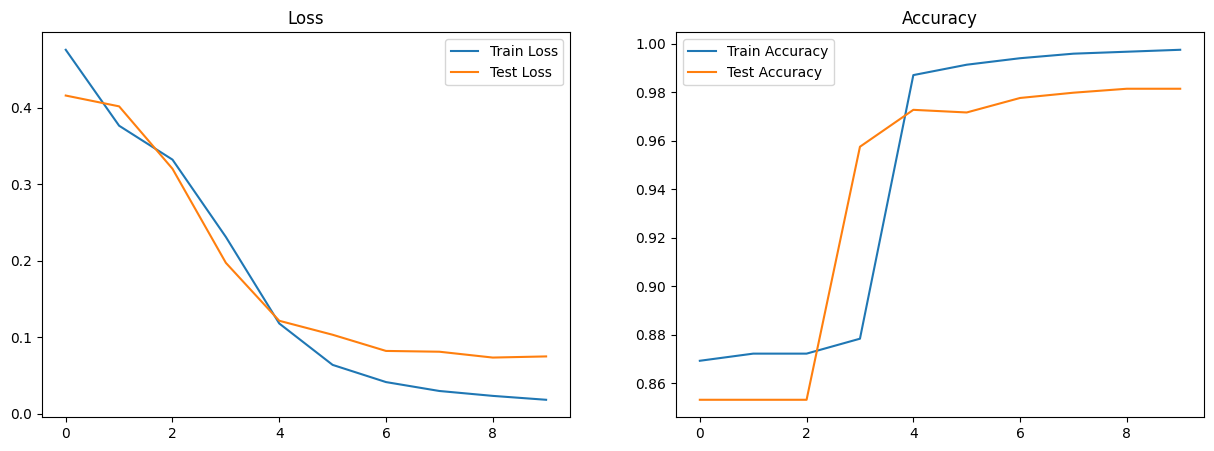

In [74]:
hist = r.history

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(['Train Loss','Test Loss'])
plt.subplot(122)
plt.title('Accuracy')
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(['Train Accuracy','Test Accuracy'])


In [75]:
model.evaluate(data_test,Ytest)

58/58 [==============================] - 1s 10ms/step - loss: 0.0750 - accuracy: 0.9815


[0.07504339516162872, 0.9815117120742798]